<a href="https://colab.research.google.com/github/navleeen/Credit-Card-Fraud-Detection/blob/main/CreditCardFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection
# **Anonymized credit card transactions labeled as fraudulent or genuine**

# Introduction
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. Eventually it is also important for companies NOT to detect transactions which are genuine as fraudulent, otherwise companies would keep blocking the credit card, which may lead to customer dissatisfaction. So here are two important aspects of this analysis:

*   What would happen when a company will not be able to detect the fraudulent transactions and would not confirm from customer about this recent transaction whether it was made by him/her.

*   In contract, what would happen when a company will detect a genuine transaction as fraudulent and keep calling the customer for confirmation or might block their card.

The dataset contains transaction that have 492 frauds out of 284,807 transactions. So the dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. When we try to build the prediction model with this kind of unbalanced dataset, the model will be more inclined towards to detect new unseen transaction as genuine as our dataset contains about 99% genuine data.



# Load Data

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
import matplotlib
import sklearn

# Print versions of libraries
print(f"Numpy version : Numpy {np.__version__}")
print(f"Pandas version : Pandas {pd.__version__}")
print(f"Matplotlib version : Matplotlib {matplotlib.__version__}")
print(f"Seaborn version : Seaborn {sns.__version__}")
print(f"SkLearn version : SkLearn {sklearn.__version__}")

# Magic Functions for In-Notebook Display
%matplotlib inline

# Setting seabon style
sns.set(style='darkgrid', palette='deep')

Numpy version : Numpy 1.23.5
Pandas version : Pandas 1.5.3
Matplotlib version : Matplotlib 3.7.1
Seaborn version : Seaborn 0.13.1
SkLearn version : SkLearn 1.2.2


# Import the Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/credit_card_data.csv', encoding='latin_1')

In [4]:
# Converting all column names to lower case
df.columns = df.columns.str.lower()

In [5]:
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.tail()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0



*   Due to confidentiality issue, original features V1, V2,... V28 have been transformed with PCA, however we may guess that these features might be orginally credit card number, expirary date, CVV, card holder name, transaction location, transaction date time, etc.

*   The only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount.

*   Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.






In [7]:
# Customising default values to view all columns
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

# pd.set_option('display.max_rows',1000)

In [8]:
df.head(10)

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


# Exploratory Data Analysis

Once the data is read into python, we need to explore/clean/filter it before processing it for machine learning It involves adding/deleting few colums or rows, joining some other data, and handling qualitative variables like dates.

Now that we have the data, I wanted to run a few initial comparisons between the three columns - Time, Amount, and Class.

**Checking concise summary of dataset**

It is also a good practice to know the features and their corresponding data types, along with finding whether they contain null values or not.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    284807 non-null  float64
 1   v1      284807 non-null  float64
 2   v2      284807 non-null  float64
 3   v3      284807 non-null  float64
 4   v4      284807 non-null  float64
 5   v5      284807 non-null  float64
 6   v6      284807 non-null  float64
 7   v7      284807 non-null  float64
 8   v8      284807 non-null  float64
 9   v9      284807 non-null  float64
 10  v10     284807 non-null  float64
 11  v11     284807 non-null  float64
 12  v12     284807 non-null  float64
 13  v13     284807 non-null  float64
 14  v14     284807 non-null  float64
 15  v15     284807 non-null  float64
 16  v16     284807 non-null  float64
 17  v17     284807 non-null  float64
 18  v18     284807 non-null  float64
 19  v19     284807 non-null  float64
 20  v20     284807 non-null  float64
 21  v21     28

## **Highlights**

* Dataset contains details of 284807 transactions with 31 features.
* There is no missing data in out dataset, every columns contain excatly 284807 rows.
* All data types are float64 ,except 1 : Class
* All data types are float64 ,except 1 : Class
* 28 columns have Sequential Names and values that don't make any logical sense - > V1 , V2 ....V28
* 3 columns : TIME , AMOUNT and CLASS which can be analysed for various INSIGHTS !
* Memory Usage : 67 MB

# Count unique values of label

In [11]:
print(df['class'].value_counts())
print('\n')
print(df['class'].value_counts(normalize=True))

0    284315
1       492
Name: class, dtype: int64


0    0.998273
1    0.001727
Name: class, dtype: float64


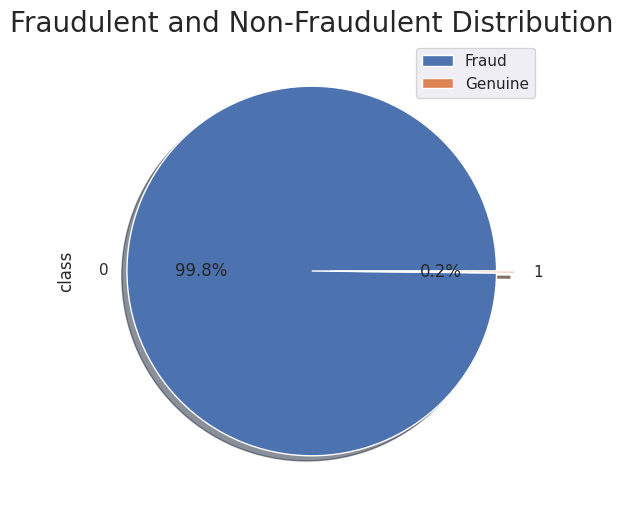

In [12]:
df["class"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Fraudulent and Non-Fraudulent Distribution",fontsize=20)
plt.legend(["Fraud", "Genuine"])
plt.show()

## **Highlights**

This dataset have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis, our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

# Generate descriptive statistics

Lets summarize the central tendency, dispersion and shape of a dataset's distribution. Out of all the columns, the only ones that made the most sense were Time, Amount, and Class (fraud or not fraud). The other 28 columns were transformed using what seems to be a PCA dimensionality reduction in order to protect user identities.

The data itself is short in terms of time (it’s only 2 days long), and these transactions were made by European cardholders.


In [13]:
df[['time','amount','class']].describe()

,time,amount,class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


**Highlights**

* On an average, credict card transaction is happening at every 94813.86 seconds.
* Average transation amount is 88.35 with standard deviation of 250, with minimum amount of 0.0 and maximum amount 25,691.16. By seeing the 75% and maximum amount, it look like the feature 'Amount' is higly positive skewed. We will check the distribution graph of amount to get more clarity.

# Finding null values

In [14]:
# Dealing with missing data
df.isnull().sum().max()

0

**Highlights**

There are no missing values present in the dataset. It is not necessary that missing values are present in the dataset in the form of NA, NAN, Zeroes etc, it may be present by some other values also that can be explored by analysising the each features.

# Removing duplicate data

In [15]:
# Count the duplicate data
print("Percentage of duplicate data : ",round(len(df[df.duplicated()])/len(df),4)*100, "%")
print("\n")
print("Duplicate vs Non duplicate counts :")
print(df.duplicated().value_counts())

Percentage of duplicate data :  0.38 %


Duplicate vs Non duplicate counts :
False    283726
True       1081
dtype: int64


There are 1081 duplicate rows present in the dataset.

In [16]:
# Removing the Duplicate Values
df.drop_duplicates(inplace = True)

In [17]:
# Check for duplicate data if they exist
print(df.duplicated().value_counts())

# Reset the index
df.reset_index(drop = True , inplace = True)

False    283726
dtype: int64


In [18]:
df.shape

(283726, 31)

In [19]:
df.reset_index(inplace = True , drop = True)

# Transaction for zero amount

In [20]:
df[df['amount'] == 0]['amount'].count()

1808

In [21]:
df[(df['amount'] == 0) & (df['class'] == 1)]['amount'].count()

25

It is impossibile to have transation of amount zero from credit card. So these 1808 zero value transaction are actually null values and need to remove. However out of 1808 zero value transations, 25 are actually recognized as fradulent and rest as geninue.

**Remove the zero value non-fraud transactions only**

Out data is highly unbalanced, and deleting the fraud transaction will make it more unbalanced.So we will delete only the genuine transactions of zero value.

In [22]:
# Remove the zero value non-fraud transactions only
df.drop(df[(df['amount'] == 0) & (df['class'] == 1)].index, inplace = True)

In [23]:
# Check if zero transactions are removed or not
df[(df['amount'] == 0) & (df['class'] == 1)]['amount'].count()

0

In [24]:
df.reset_index(inplace = True , drop = True)

# Distribution of Amount

<ipython-input-25-a2f50b258f96>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['amount'], bins=100)


[]

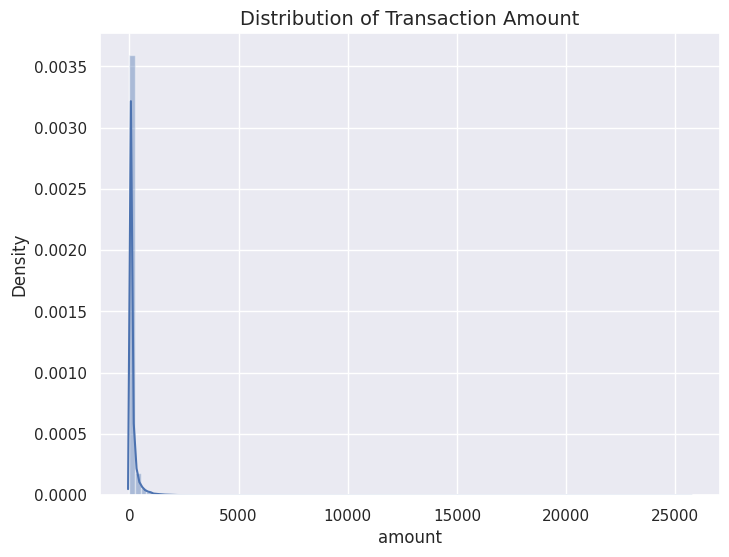

In [25]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Transaction Amount', fontsize=14)
sns.distplot(df['amount'], bins=100)
plt.plot()

Most the transaction amount falls between 0 and about 3000 and we have some outliers for really big amount transactions and it may actually make sense to drop those outliers in our analysis if they are just a few points that are very extreme.

**Distribution of Amount for Fradulent & Genuine transactions**

<ipython-input-26-94af8337aeb9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['class'] == 1]['amount'], bins=100, ax=axs[0])
<ipython-input-26-94af8337aeb9>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['class'] == 0]['amount'], bins=100, ax=axs[0])


[]

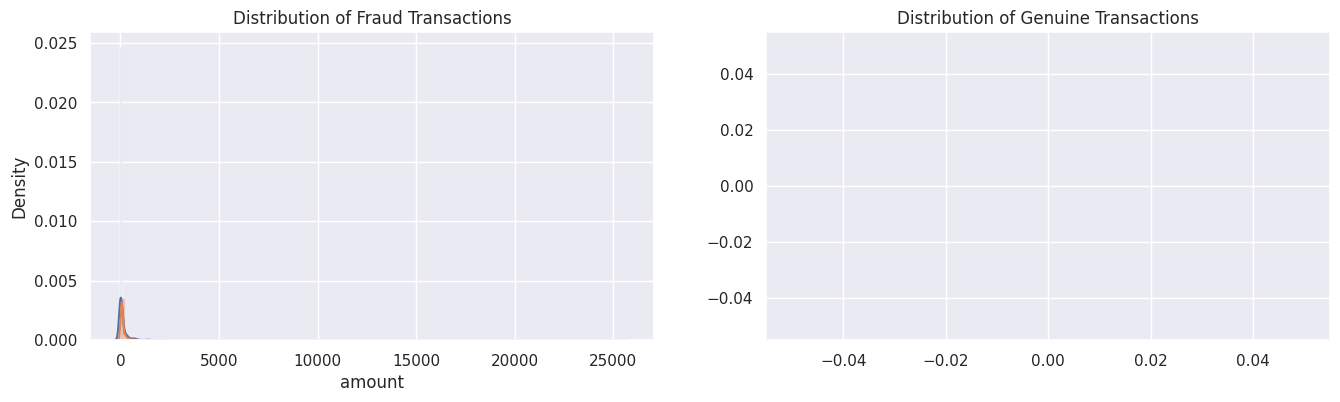

In [26]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df[df['class'] == 1]['amount'], bins=100, ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(df[df['class'] == 0]['amount'], bins=100, ax=axs[0])
axs[1].set_title("Distribution of Genuine Transactions")

plt.plot()

This graph shows that most of the fraud transaction amount is less than 500 dollor. This also shows that the fraud transaction is very high for an amount near to 0, lets find that amount.

In [27]:
print("Fraud Transaction distribution : \n",df[(df['class'] == 1)]['amount'].value_counts().head())
print("\n")
print("Maximum amount of fraud transaction - ",df[(df['class'] == 1)]['amount'].max())
print("Minimum amount of fraud transaction - ",df[(df['class'] == 1)]['amount'].min())

Fraud Transaction distribution : 
 1.00     105
99.99     27
0.76      17
0.77      10
0.01       5
Name: amount, dtype: int64


Maximum amount of fraud transaction -  2125.87
Minimum amount of fraud transaction -  0.01


So there are 105 fraud transactions for just one dollor and 27 fraud transaction for $99.99 and the highest fraud transaction amount was 2125.87 and lowest was just 0.01.


**Distribution of Amount w.r.t Class**

[]

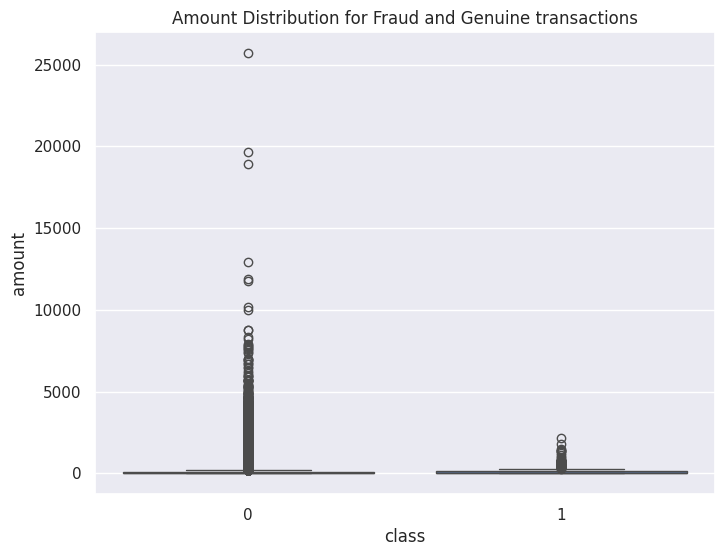

In [28]:
plt.figure(figsize=(8,6))
sns.boxplot(x='class', y='amount',data = df)
plt.title('Amount Distribution for Fraud and Genuine transactions')
plt.plot()

Most of the transaction amount falls between 0 and about 3000 and we have some outliers for really big amount transactions and it may actually make sense to drop those outliers in our analysis if they are just a few points that are very extreme. Also we should be conscious about that, these outliers should not be the fraudulent transaction. Generally, fraudulent trasactions can be of big amount and removing them from the data, can make the predicting model bais.

So we can essentially build a model that realistically predicts transaction as fraud without affecting outliers. It may not be really useful to actually have our model train on these extreme outliers.


# Distribution of Time

<ipython-input-29-e05ceaed4b51>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['time'], bins=100)


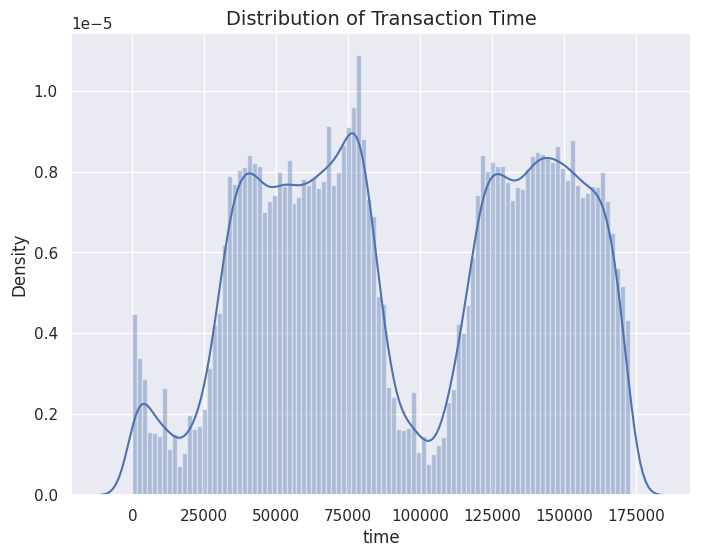

In [29]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Transaction Time', fontsize=14)
sns.distplot(df['time'], bins=100)
plt.show()

By seeing graph, we can see there are two peaks in the graph and even there are some local peaks. We can think of these as the time of the day, like the peak is the day time when most people do the transactions and the depth is the night time when most people just sleeps. We aleady know that our data contains credit card transaction for only two days, so there are two peaks for day time and one depth for one night time.


**Distribution of time w.r.t. transactions types**

<ipython-input-30-fae9ddb0c80e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['class'] == 1)]['time'], bins=100, ax=axs[0])
<ipython-input-30-fae9ddb0c80e>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['class'] == 0)]['time'], bins=100, ax=axs[1])


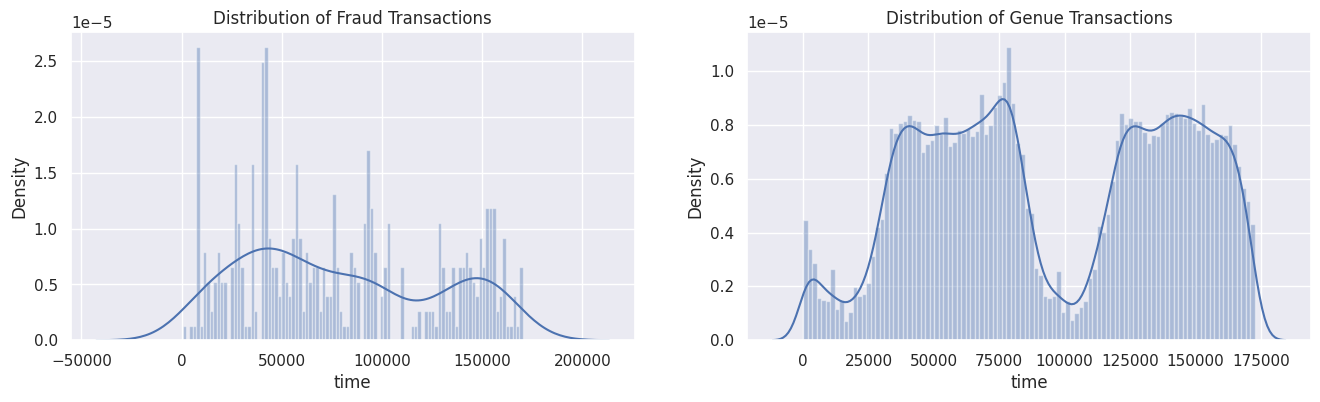

In [30]:
fig, axs = plt.subplots(ncols=2, figsize=(16,4))

sns.distplot(df[(df['class'] == 1)]['time'], bins=100, ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(df[(df['class'] == 0)]['time'], bins=100, ax=axs[1])
axs[1].set_title("Distribution of Genue Transactions")

plt.show()

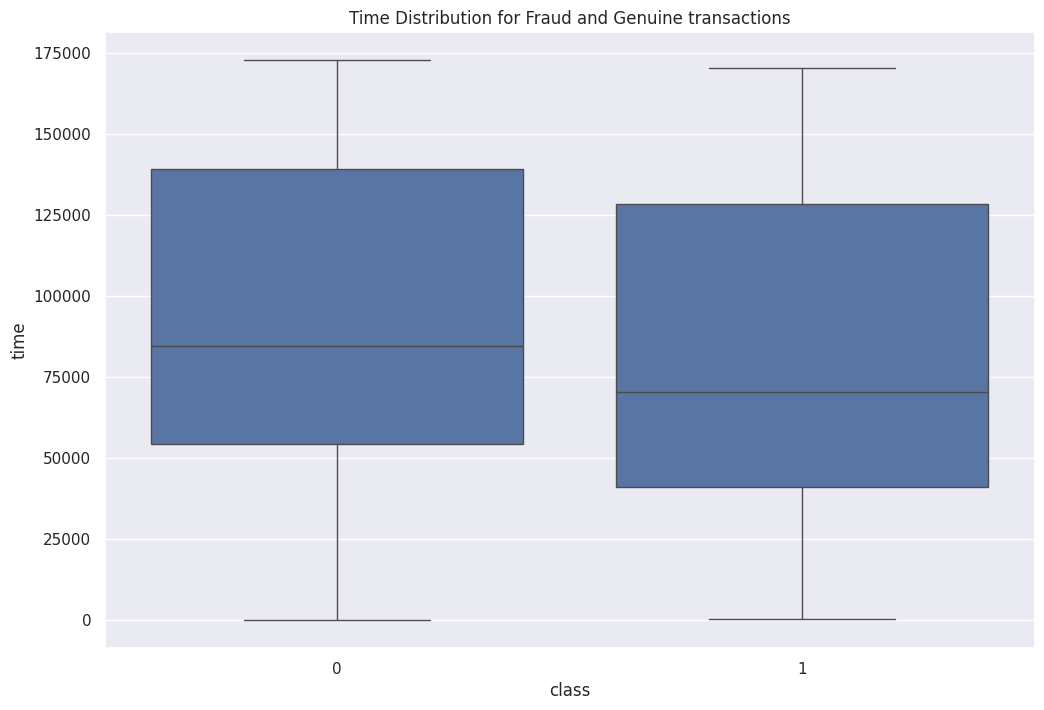

In [31]:
plt.figure(figsize=(12,8))
sns.boxplot(x='class', y='time',data = df)
plt.title('Time Distribution for Fraud and Genuine transactions')
plt.show()

**Distribution of transaction type w.r.t amount**

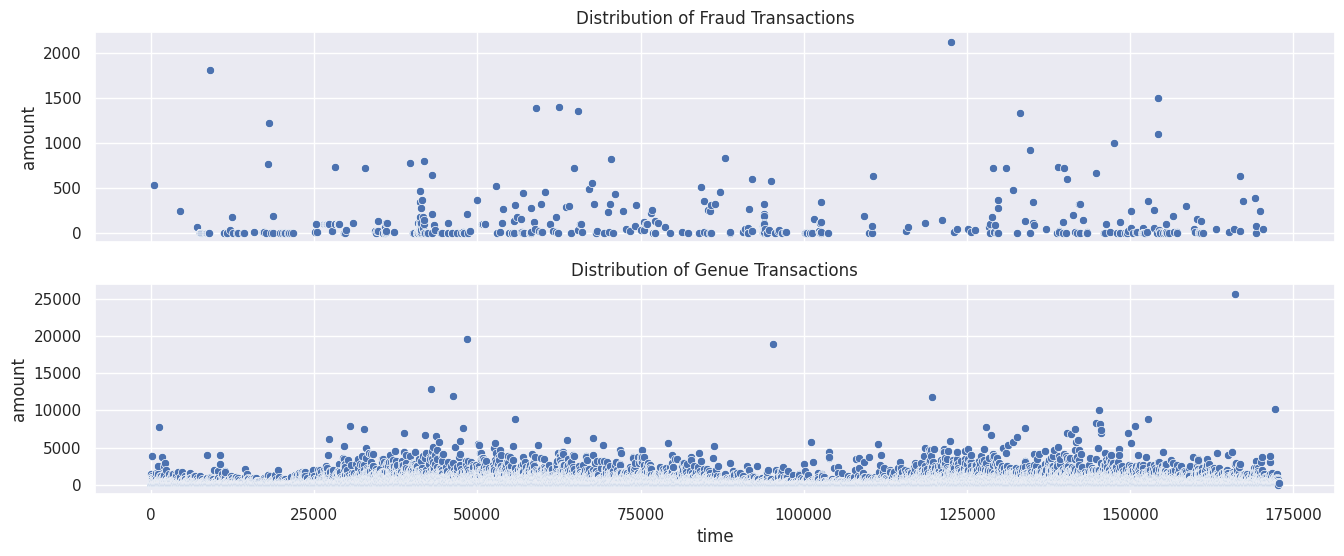

In [32]:
fig, axs = plt.subplots(nrows=2,sharex=True,figsize=(16,6))

sns.scatterplot(x='time',y='amount', data=df[df['class']==1], ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.scatterplot(x='time',y='amount', data=df[df['class']==0], ax=axs[1])
axs[1].set_title("Distribution of Genue Transactions")

plt.show()

# Removal of Outliers

In [33]:
Q3 = np.percentile(df['amount'], 75)
Q1 = np.percentile(df['amount'], 25)

# calculate interquartrile range - IQR = thirdQuartile - firstQuartile
IQR = (Q3 - Q1)

# Usually we take scale value of 1.5 times IQR to calculate. But this scale depends on the distribution followed by the data.
# Say if my data seem to follow exponential distribution then this scale would change.
# So I am taking sacle from 1.5 to 5.

# Lower outlier boundry (LOB) / Lower Whisker
LOB = Q1 - (IQR * 5.0)
print(f"Lower Whisker : {LOB}")

# Upper outlier boundry (UOB) / Upper Whisker
UOB = Q3 + (IQR * 5.0)
print(f"Upper Whisker : {UOB}")

amtAllOutliers = df[(df['amount'] < LOB) | (df['amount'] > UOB)]['amount']
amtFrdOutliers = df[(df['class'] == 1) & ((df['amount'] < LOB) | (df['amount'] > UOB))]['amount']
amtGenuOutliers = df[(df['class'] == 0) & ((df['amount'] < LOB) | (df['amount'] > UOB))]['amount']

print('\n')
print("No of all type of transaction outliers : ", amtAllOutliers.count())
print("No of fraud transaction outliers : ", amtFrdOutliers.count())
print("No of genuine transaction outliers : ", amtGenuOutliers.count())
print("Percentage of outliers : ", round((amtGenuOutliers.count()/len(df))*100,2))


Lower Whisker : -353.82
Upper Whisker : 436.96999999999997


No of all type of transaction outliers :  11213
No of fraud transaction outliers :  40
No of genuine transaction outliers :  11173
Percentage of outliers :  3.94


**There are total 11,213 outliers out of which 3.94% are fraudulent.**

**Checking proportion of data for fraud vs genuine**

In [34]:
# Check the balace of data including outliers
print("Balace of data including outliers")
print(df['class'].value_counts(normalize=True))

print('\n')
# Check the balance of data excluding outliers
print("Balace of data excluding outliers")
print(df[(df['amount'] < LOB) | (df['amount'] > UOB)]['class'].value_counts(normalize=True))

Balace of data including outliers
0    0.998421
1    0.001579
Name: class, dtype: float64


Balace of data excluding outliers
0    0.996433
1    0.003567
Name: class, dtype: float64


Now we have checked the total number of outliers in Amount feature and how many of them are fraudulents. We found that balance of fraud vs genuine is not impacted much, so we can remove the outlier.


**Delete Outliers**

In [35]:
# check shape before deleting outliers
df.shape

(283701, 31)

In [36]:
# Removing outliers
df = df.drop(amtAllOutliers.index)

In [37]:
# check shape after deleting outliers
df.shape

(272488, 31)

In [38]:
df.reset_index(inplace = True , drop = True)

**Check Amount Distribution after deleting outliers**

<ipython-input-39-3224cdd235eb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['amount'], bins=100, ax=axs[0])


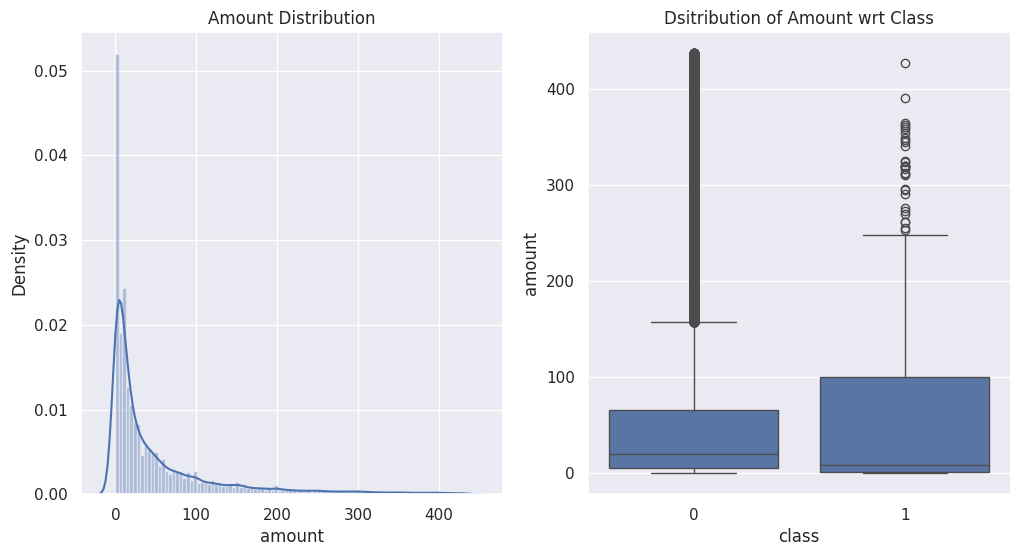

In [39]:
fig, axs = plt.subplots(ncols=2,figsize=(12,6))

sns.distplot(df['amount'], bins=100, ax=axs[0])
axs[0].set_title("Amount Distribution")

sns.boxplot(x='class', y='amount',data = df, ax=axs[1])
axs[1].set_title("Dsitribution of Amount wrt Class")
plt.show()

# Categorical vs Continuous Features

Finding unique values for each column to understand which column is categorical and which one is Continuous

In [40]:
# Finding unique values for each column
df[['time','amount','class']].nunique()

time      122823
amount     24798
class          2
dtype: int64

**Correlation Among Explanatory Variables**

Having **too many features** in a model is not always a good thing because it might cause overfitting and worser results when we want to predict values for a new dataset. Thus, **if a feature does not improve your model a lot, adding it may not be a better choice**.

Another important thing is **correlation**. **If there is a very high correlation between two features, keeping both of them is not a good idea most of the time not to cause overfitting**. However, this does not mean that you must remove one of the highly correlated features.


**Lets find out top 10 features which are highly correlated with price**

In [41]:
df[['time','amount','class']].corr()['class'].sort_values(ascending=False).head(10)

class     1.000000
amount    0.004124
time     -0.013218
Name: class, dtype: float64

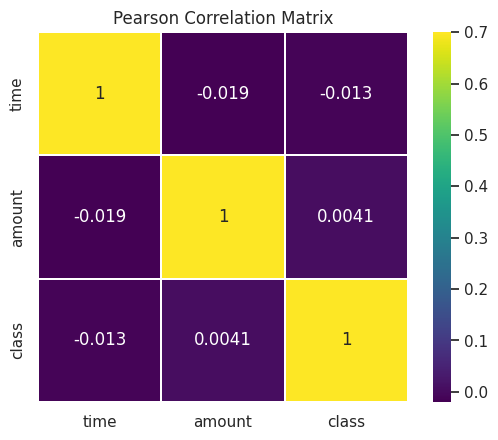

In [42]:
plt.title('Pearson Correlation Matrix')
sns.heatmap(df[['time', 'amount','class']].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="viridis",
            linecolor='w',annot=True);

It looks like that no features are highly correlated with any other features.


**Lets check the data again after cleaning**

In [43]:
df.shape

(272488, 31)

In [44]:
df['class'].value_counts(normalize=True)

0    0.998503
1    0.001497
Name: class, dtype: float64

# Feature Engineering

**Feature engineering on Time**

In [45]:
# Converting time from second to hour
df['time'] = df['time'].apply(lambda sec : (sec/3600))

In [46]:
# Calculating hour of the day
df['hour'] = df['time']%24   # 2 days of data
df['hour'] = df['hour'].apply(lambda x : math.floor(x))

In [47]:
# Calculating First and Second day
df['day'] = df['time']/24   # 2 days of data
df['day'] = df['day'].apply(lambda x : 1 if(x==0) else math.ceil(x))

In [48]:
df[['time','hour','day','amount','class']]

,time,hour,day,amount,class
0,0.000000,0,1,149.62,0
1,0.000000,0,1,2.69,0
2,0.000278,0,1,378.66,0
3,0.000278,0,1,123.50,0
4,0.000556,0,1,69.99,0
...,...,...,...,...,...
272483,47.996111,23,2,0.77,0
272484,47.996389,23,2,24.79,0
272485,47.996667,23,2,67.88,0
272486,47.996667,23,2,10.00,0


**Fraud and Genuine transaction Day wise**

In [49]:
# calculating fraud transaction daywise
dayFrdTran = df[(df['class'] == 1)]['day'].value_counts()
# calculating genuine transaction daywise
dayGenuTran = df[(df['class'] == 0)]['day'].value_counts()
# calculating total transaction daywise
dayTran = df['day'].value_counts()

print("No of transaction Day wise:")
print(dayTran)

print("\n")

print("No of fraud transaction Day wise:")
print(dayFrdTran)

print("\n")

print("No of genuine transactions Day wise:")
print(dayGenuTran)

print("\n")

print("Percentage of fraud transactions Day wise:")
print((dayFrdTran/dayTran)*100)

No of transaction Day wise:
1    138355
2    134133
Name: day, dtype: int64


No of fraud transaction Day wise:
1    242
2    166
Name: day, dtype: int64


No of genuine transactions Day wise:
1    138113
2    133967
Name: day, dtype: int64


Percentage of fraud transactions Day wise:
1    0.174912
2    0.123758
Name: day, dtype: float64


* Total number of transaction on Day 1 was 1,38,355, out of which 242 was fraud
and 1,38,113 was genuie. Fraud transation was 0.17% of total transaction on day 1.

* Total number of transaction on Day 2 was 1,34,133, out of which 166 was fraud and 1,33,967 was genuie. Fraud transation was 0.12% of total transaction on day 2.

* Most of the transaction including the fraud transaction happened on day 1.

**Lets see the above numbers in graph**

<ipython-input-51-df5edf7a94f1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['class']==0]['time'].values , color = 'green' , ax = axs[0])
<ipython-input-51-df5edf7a94f1>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['class']==1]['time'].values , color = 'red' ,ax = axs[1])


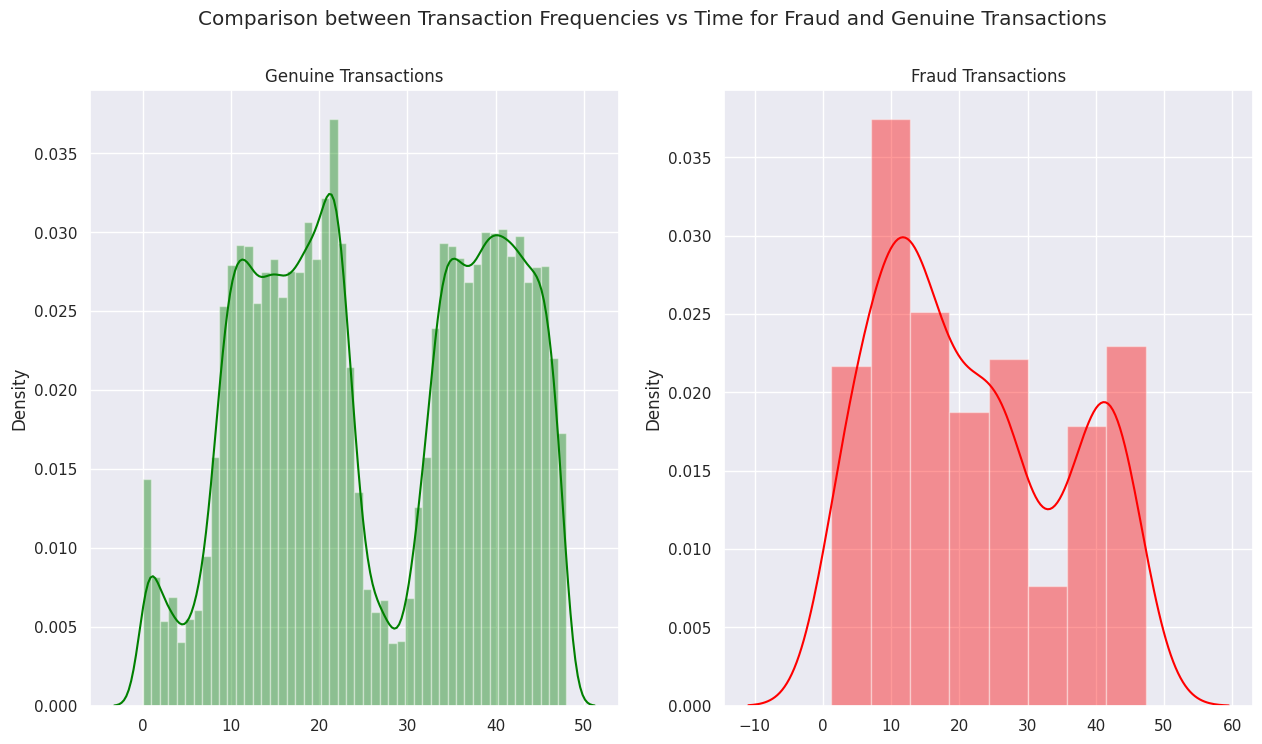

In [51]:
# Time plots
fig , axs = plt.subplots(nrows = 1 , ncols = 2 , figsize = (15,8))

sns.distplot(df[df['class']==0]['time'].values , color = 'green' , ax = axs[0])
axs[0].set_title('Genuine Transactions')

sns.distplot(df[df['class']==1]['time'].values , color = 'red' ,ax = axs[1])
axs[1].set_title('Fraud Transactions')

fig.suptitle('Comparison between Transaction Frequencies vs Time for Fraud and Genuine Transactions')
plt.show()

<ipython-input-52-88fc213fa9bb>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['class'] == 0]["hour"], color='g') # Genuine - green
<ipython-input-52-88fc213fa9bb>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['class'] == 1]["hour"], color='r') # Fraudulent - Red


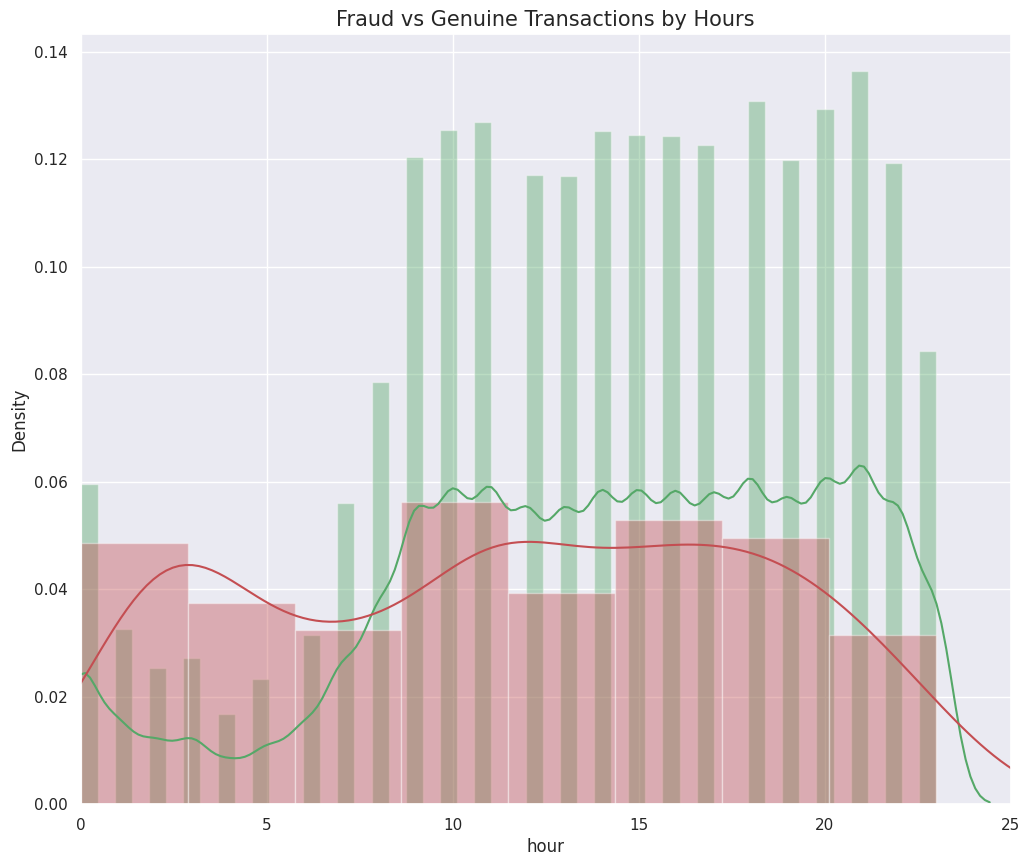

In [52]:
# Let's see if we find any particular pattern between time ( in hours ) and Fraud vs Genuine Transactions

plt.figure(figsize=(12,10))

sns.distplot(df[df['class'] == 0]["hour"], color='g') # Genuine - green
sns.distplot(df[df['class'] == 1]["hour"], color='r') # Fraudulent - Red

plt.title('Fraud vs Genuine Transactions by Hours', fontsize=15)
plt.xlim([0,25])
plt.show()

**Above graph shows that most of the Fraud transactions are happening at night time (0 to 7 hours) when most of the people are sleeping and Genuine transaction are happening during day time (9 to 21 hours).**


<Axes: xlabel='hour'>

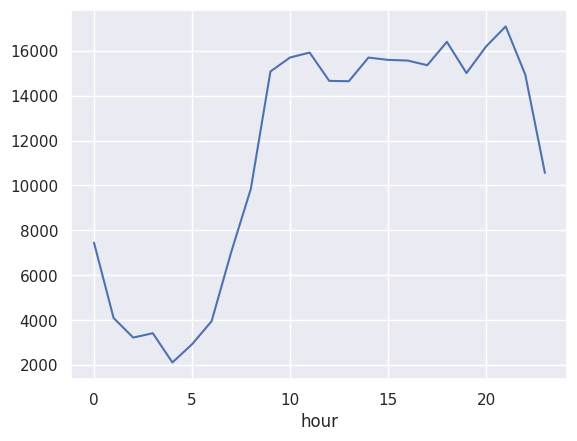

In [53]:
df[['time','hour','day','amount','class']].groupby('hour').count()['class'].plot()

**Visualising Data for detecting any particular Pattern or Anomaly using Histogram Plots**

Finally visulaising all columns once and for all to observe any abnormality

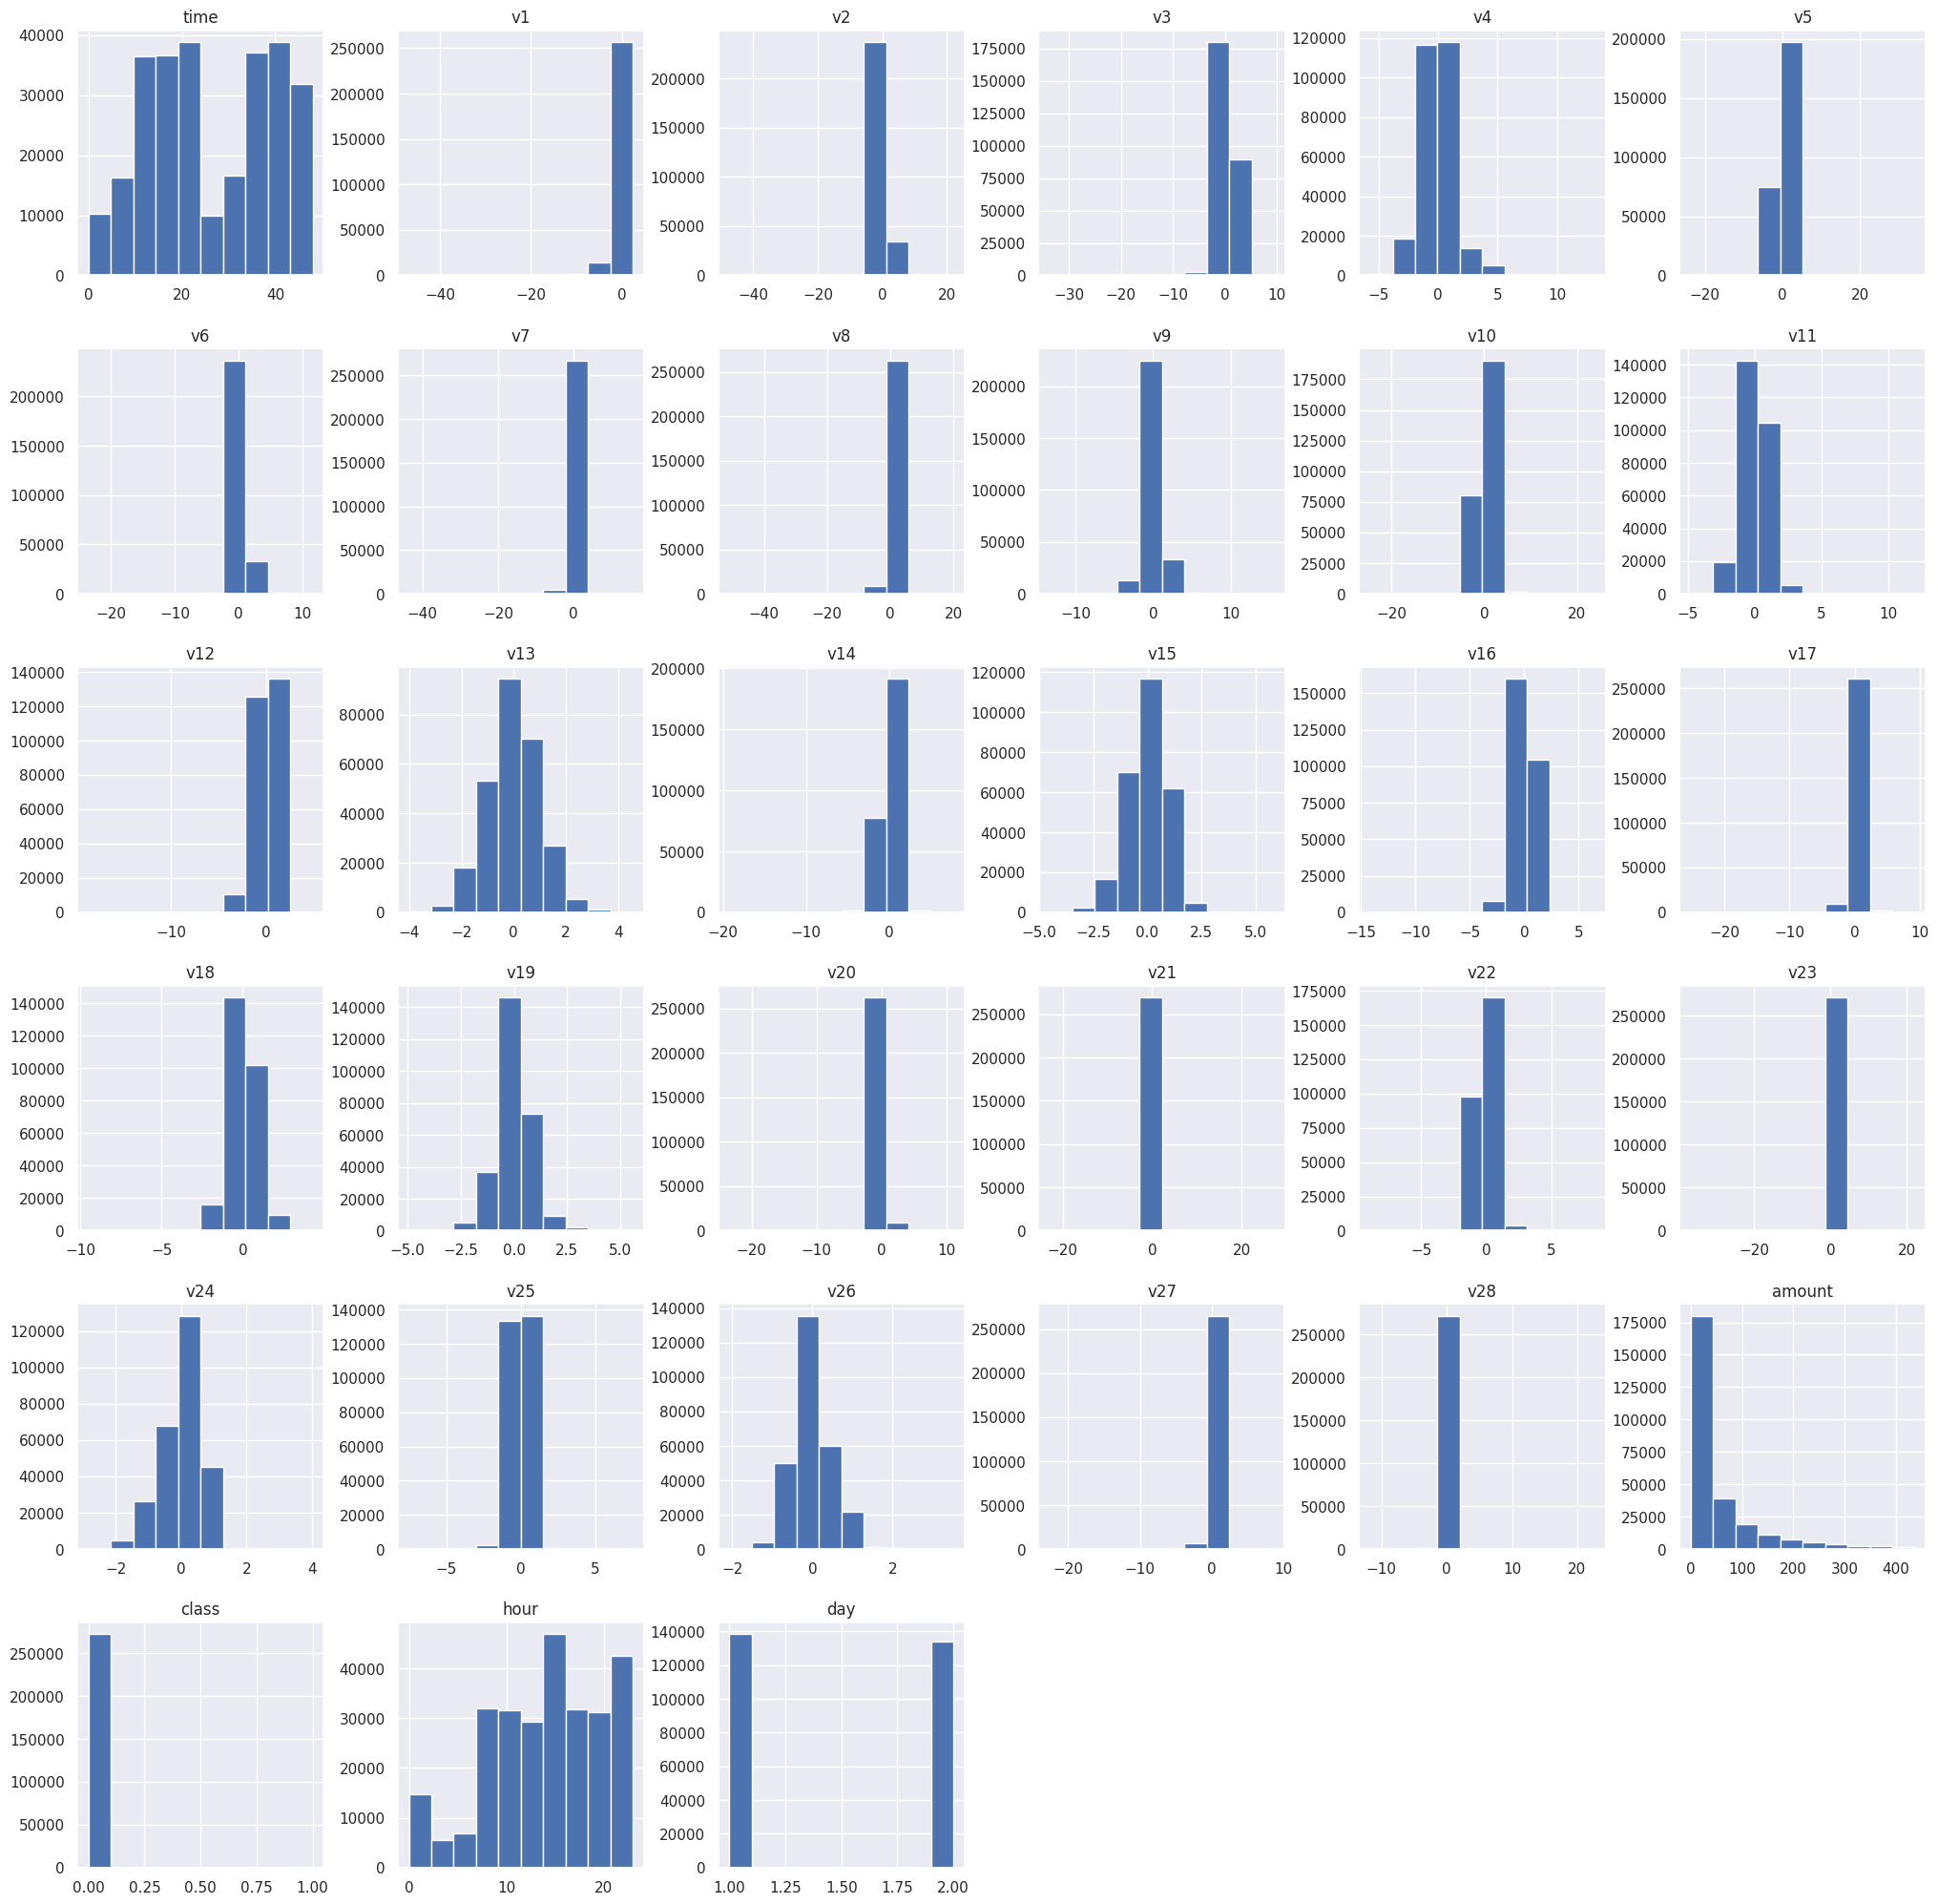

In [54]:
df.hist(figsize = (25,25))
plt.show()

## Reset the index

In [55]:
df.reset_index(inplace = True , drop = True)

# Scale Amount Feature

* It is good idea to scale the data, so that the column(feature) with lesser significance might not end up dominating the objective function due to its larger range. like a column like age has a range between 0 to 80, but a column like salary has range from thousands to lakhs, hence, salary column will dominate to predict the outcome even if it may not be important.

* In addition, features having different unit should also be scaled thus providing each feature equal initial weightage. Like Age in years and Sales in Dollars must be brought down to a common scale before feeding it to the ML algorithm.

* This will result in a better prediction model.

**Scaling using the log :** There are two main reasons to use logarithmic scales in charts and graphs.

* The first is to respond to skewness towards large values; i.e., cases in which one or a few points are much larger than the bulk of the data.

* The second is to show percent change or multiplicative factors.


**Scaling:** Keep in mind that in order to implement a PCA transformation features need to be previously scaled.



In [56]:
# # Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)

# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# df['ScaledAmount'] = scaler.fit_transform(df[['Amount']])
# df['ScaledAmount'].tail()
# df['ScaledTime'] = scaler.fit_transform(df[['Time']])
# df['ScaledTime'].tail()
# df[['Time','ScaledTime','Amount','ScaledAmount','Class']].tail(10)
# df.head().T

**Scale amount by Log**

In [57]:
df['amount_log'] = np.log(df.amount + 0.01)

**Scale the Amount Column**

In [58]:
from sklearn.preprocessing import StandardScaler # importing a class from a module of a library

ss = StandardScaler() # object of the class StandardScaler ()
df['amount_scaled'] = ss.fit_transform(df['amount'].values.reshape(-1,1))

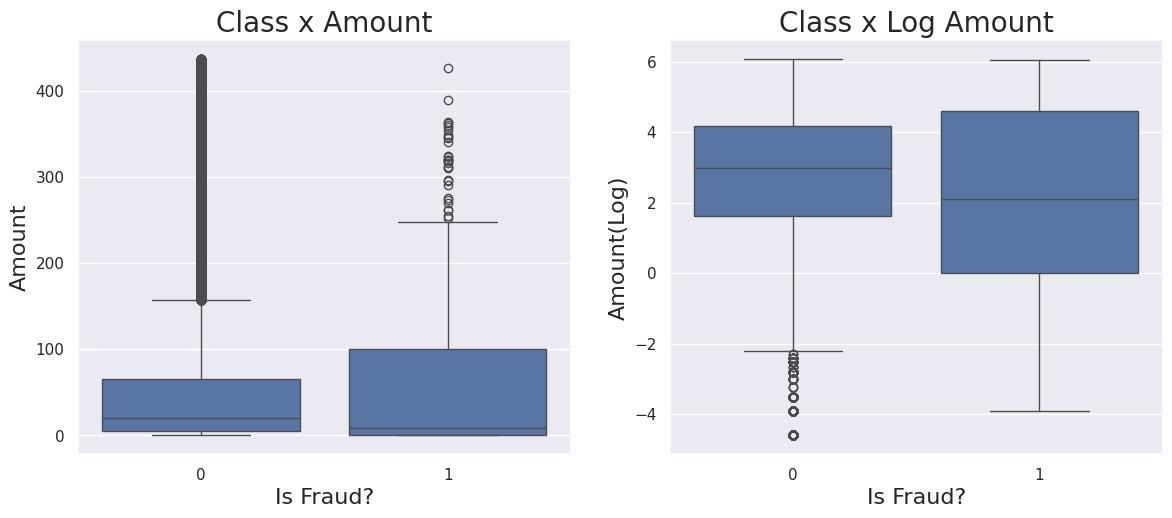

In [59]:
#Feature engineering to a better visualization of the values
plt.figure(figsize=(14,6))
# Let's explore the Amount by Class and see the distribuition of Amount transactions
plt.subplot(121)
ax = sns.boxplot(x ="class",y="amount",data=df)
ax.set_title("Class x Amount", fontsize=20)
ax.set_xlabel("Is Fraud?", fontsize=16)
ax.set_ylabel("Amount", fontsize = 16)

plt.subplot(122)
ax1 = sns.boxplot(x ="class",y="amount_log", data=df)
ax1.set_title("Class x Log Amount", fontsize=20)
ax1.set_xlabel("Is Fraud?", fontsize=16)
ax1.set_ylabel("Amount(Log)", fontsize = 16)

# plt.subplot(123)
# ax1 = sns.boxplot(x ="class",y="amount_scaled", data=df)
# ax1.set_title("Class x Scaled Amount", fontsize=20)
# ax1.set_xlabel("Is Fraud?", fontsize=16)
# ax1.set_ylabel("Amount(Log)", fontsize = 16)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

* We can see a slightly difference in log amount of our two Classes.
* The IQR of fraudulent transactions are higher than normal transactions, but normal transactions have highest values.

**Comparing Amount and Transaction Class**

In [60]:
legit_list = df[df['class']==0]['amount'].describe().tolist()
fraud_list = df[df['class']==1]['amount'].describe().tolist()
pd.DataFrame(np.transpose(legit_list) , np.transpose(fraud_list))

,0
408.000000,272080.000000
61.590637,53.272865
93.780252,77.951786
0.010000,0.000000
1.000000,5.000000
8.150000,19.990000
99.990000,66.000000
426.400000,436.950000


In [61]:
comp_df = pd.DataFrame([df[df['class']==0]['amount'].describe().to_dict() , df[df['class']==1]['amount'].describe().to_dict()])
comp_df = comp_df.T
comp_df

,0,1
count,272080.000000,408.000000
mean,53.272865,61.590637
std,77.951786,93.780252
min,0.000000,0.010000
25%,5.000000,1.000000
50%,19.990000,8.150000
75%,66.000000,99.990000
max,436.950000,426.400000


<Axes: >

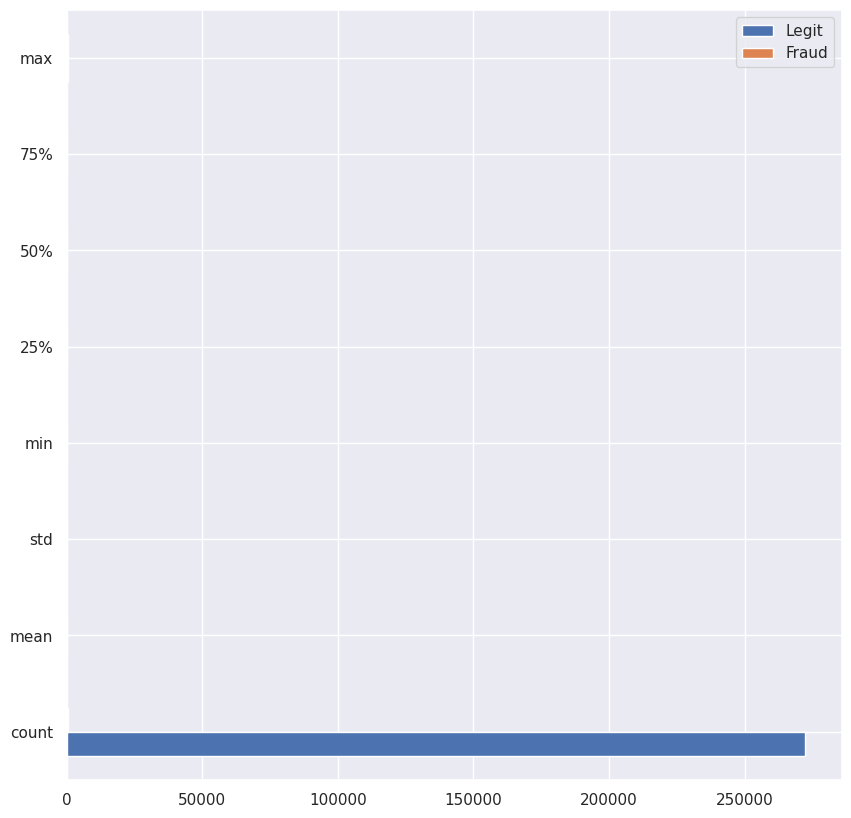

In [62]:
comp_df.columns = ['Legit' , 'Fraud']
comp_df.plot(kind = 'barh' , figsize = (10,10))

In [63]:
df[['time','hour','day','amount','amount_log','amount_scaled','class']]

,time,hour,day,amount,amount_log,amount_scaled,class
0,0.000000,0,1,149.62,5.008166,1.235405,0
1,0.000000,0,1,2.69,0.993252,-0.648839,0
2,0.000278,0,1,378.66,5.936665,4.172636,0
3,0.000278,0,1,123.50,4.816322,0.900440,0
4,0.000556,0,1,69.99,4.248495,0.214222,0
...,...,...,...,...,...,...,...
272483,47.996111,23,2,0.77,-0.248461,-0.673462,0
272484,47.996389,23,2,24.79,3.210844,-0.365427,0
272485,47.996667,23,2,67.88,4.217889,0.187164,0
272486,47.996667,23,2,10.00,2.303585,-0.555095,0


**Saving preprocessed data as serialized files**

* To deploy the predictive models built we save them along with the required data files as serialized file objects.

* We save cleaned and processed input data, tuned predictive models as files so that they can later be re-used/shared.

In [64]:
### Save the processed data

# Lets save the processed data so that we can use it later without running the preprocessing technique again and again.
# df.to_csv('elementary_data_processed.csv' , index = False)

import pickle
import os

In [65]:
CreditCardFraudDataCleaned = df

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final Data set after all the transformations as a file
with open('CreditCardFraudDataCleaned.pkl', 'wb') as fileWriteStream:
    pickle.dump(CreditCardFraudDataCleaned, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file is saved at Location:',os.getcwd())

pickle file is saved at Location: /content


**Load preprocessed data**

In [66]:
# Reading a Pickle file
with open('CreditCardFraudDataCleaned.pkl', 'rb') as fileReadStream:
    CreditCardFraudDataFromPickle = pickle.load(fileReadStream)
    # Don't forget to close the filestream!
    fileReadStream.close()

# Checking the data read from pickle file. It is exactly same as the DiamondPricesData
df = CreditCardFraudDataFromPickle
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class,hour,day,amount_log,amount_scaled
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,1,5.008166,1.235405
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,1,0.993252,-0.648839
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,1,5.936665,4.172636
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,1,4.816322,0.900440
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,1,4.248495,0.214222


In [67]:
# df = pd.read_csv('elementary_data_processed.csv')

In [68]:
df.shape

(272488, 35)

In [69]:
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class,hour,day,amount_log,amount_scaled
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,1,5.008166,1.235405
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,1,0.993252,-0.648839
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,1,5.936665,4.172636
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,1,4.816322,0.900440
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,1,4.248495,0.214222


**Splitting data into Training and Testing samples**

We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [70]:
df.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class', 'hour', 'day', 'amount_log', 'amount_scaled'],
      dtype='object')

In [71]:
# Separate Target Variable and Predictor Variables
X = df.drop(['time','class','hour','day','amount','amount_log','amount_scaled'],axis=1)
y = df['class']

In [72]:
X

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272483,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731
272484,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527
272485,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561
272486,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533


In [73]:
# Load the library for splitting the data
from sklearn.model_selection import train_test_split

In [74]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [75]:
# Quick sanity check with the shapes of Training and testing datasets
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (190741, 28)
y_train -  (190741,)
X_test -  (81747, 28)
y_test -  (81747,)


## Baseline for models

### **Let's Discuss Next Steps -**

1 **Classification Models**:

Logistic Regression

Decision Trees

Random Forest

2 **Class Imbalance Solutions**:

SMOTE

3 **Metrics**:

Accuracy Score

Confusion Matrix

F1 Score



## **Model Building**

We are aware that our dataset is highly imbalanced, however we check the performance of imbalance dataset first and later we implement some techniques to balance the dataset and again check the performance of balanced dataset.

## **1. Logistic Regression**

**1.1 Logistic Regression with imbalanced data**

In [76]:
from sklearn.linear_model import LogisticRegression # Importing Classifier Step

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # Sequence for splitting

logreg = LogisticRegression(solver='lbfgs') # () towards the end
logreg.fit(X_train, y_train)

LogisticRegression()

**Predict from Test set**

In [78]:
y_pred = logreg.predict(X_test)

**Model Evolution**

In [79]:
from sklearn import metrics

In [80]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     81626
           1       0.80      0.50      0.62       121

    accuracy                           1.00     81747
   macro avg       0.90      0.75      0.81     81747
weighted avg       1.00      1.00      1.00     81747



In [81]:
print("Accuracy : ",metrics.accuracy_score(y_pred , y_test))

Accuracy :  0.9990825351389042


In [82]:
# Predicted values counts for fraud and genuine of test dataset
pd.Series(y_pred).value_counts()

0    81671
1       76
dtype: int64

Our model predicted 76 transaction as fraud and 81671 transactions as genuine from test dataset.

In [83]:
# Actual values counts for fraud and genuine of test dataset
pd.Series(y_test).value_counts()

0    81626
1      121
Name: class, dtype: int64

There are originally 121 fraud transactions and our model predicted only 76 fraud transaction. So the accuracy of our model should be 76/121

In [84]:
76/121

0.628099173553719

**However, this not the case. Actually there are originally 121 fraud transactions and 81626 genuine transactions in test dataset. However our model predicted only 76 fraud transaction. Also it should be kept in mind that these 76 predicted fraud transaction may not be identified correctly. It means that these predicted 76 fraud transactions are NOT only from 121 original fraud transaction, however they may be from genuine transactions as well.**

## **Model Evolution Matrix**

**Confusion Matrix**

In [85]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[81611,    15],
       [   60,    61]])

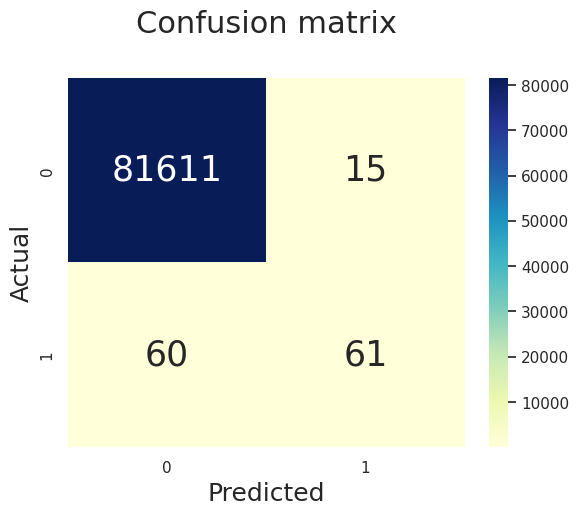

In [86]:
# Heatmap for Confusion Matrix
# ax= plt.subplot()

p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="YlGnBu" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)

# ax.xaxis.set_ticklabels(['Genuine', 'Fraud']);
# ax.yaxis.set_ticklabels(['Genuine', 'Fraud']);

plt.show()

**There are 61 transaction recognised as True Postive, means they are orignally fraud transactions and our model precited them as fraud.**

**True Negative** - 81611 (truely saying negative - genuine transaction correctly identified as genuine)

**True Postive** - 61 (truely saying positive - fraud transaction correctly identified as fraud)

**False Negative** - 60 ( falsely saying negative - fraud transaction incorrectly identified as genuine)

**False Positive** - 15 ( falsely saying positive - genuine transaction incorrectly identified as fraud)

We already know that we have 121 fraud transaction in our test dataset, but our model predicted only 61 fraud transaction. So the real accuracy of our model is
61/121.

In [87]:
61/121

0.5041322314049587

**1.2 Logistic Regression with SMOTE data**

In [91]:
from imblearn.over_sampling import SMOTE

In [92]:
sm = SMOTE()
X_res, y_res = sm.fit_resample(X,y)

In [93]:
y_res.value_counts()

0    272080
1    272080
Name: class, dtype: int64

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)

# SMOTE Sampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Accuracy :",metrics.accuracy_score(y_pred , y_test))
print("AUC : ",metrics.roc_auc_score(y_test , y_pred))

Accuracy : 0.9472214054689797
AUC :  0.9472175757706854


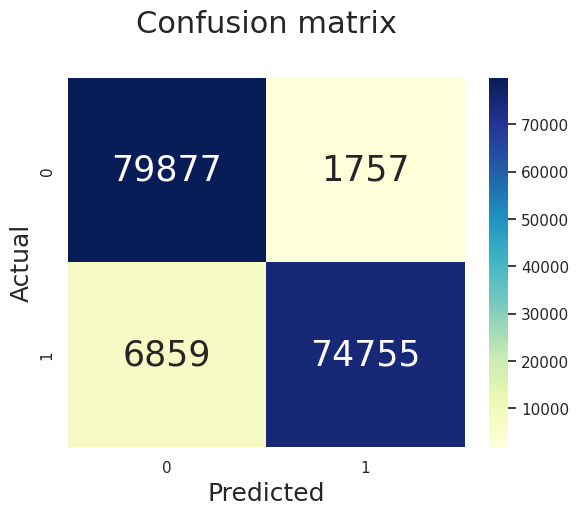

In [95]:
# Heatmap for Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="YlGnBu" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

# ax.xaxis.set_ticklabels(['Genuine', 'Fraud']);
# ax.yaxis.set_ticklabels(['Genuine', 'Fraud']);

plt.show()